<a href="https://colab.research.google.com/github/Notmaneesh/Linear_Regression_from_scratch/blob/main/Linear_regression(SALARY_PREDICTION).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np

LINEAR REGRESSION

In [6]:
import numpy as np

class Linear_regression():
    def __init__(self, learning_rate, number_of_iterations):
        self.learning_rate = learning_rate
        self.number_of_iterations = number_of_iterations
        self.w = None
        self.bias = None

    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.w = np.zeros(self.n)
        self.bias = 0
        self.X = X
        self.Y = Y

        for i in range(self.number_of_iterations):
            self.update_weight()

        self.Y_prediction = self.predict(self.X)

    def update_weight(self):
        Y_prediction = self.predict(self.X)

        # calculating the gradient
        dw = -(2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
        db = -2 * np.sum(self.Y - Y_prediction) / self.m

        # updating the weights and bias
        self.w = self.w - self.learning_rate * dw
        self.bias = self.bias - self.learning_rate * db

    def predict(self, X):
        return X.dot(self.w) + self.bias


Implementing the above **linear regression**

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [8]:
# Loading from file to pandas dataframe
df1 = pd.read_csv('/content/salary_data.csv')

In [9]:
df1

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [10]:
df1.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [11]:
df1.shape

(30, 2)

In [12]:
df1.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Splitting the features and the target

In [13]:
X= df1.iloc[:,:-1].values
Y= df1.iloc[:,1].values

In [14]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

Splitting into train and test data

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=2)

In [16]:
X_train

array([[ 6.8],
       [ 2.9],
       [ 9.6],
       [ 4. ],
       [ 2.2],
       [ 3.9],
       [ 5.1],
       [10.3],
       [ 9. ],
       [ 5.3],
       [ 1.5],
       [ 3.2],
       [ 9.5],
       [ 8.7],
       [ 5.9],
       [ 4. ],
       [ 7.9],
       [10.5],
       [ 4.1],
       [ 4.9],
       [ 3.2]])

In [17]:
model = Linear_regression(learning_rate=0.02, number_of_iterations=1000)

In [18]:
model.fit(X_train, Y_train)

In [19]:
Y_prediction= model.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,Y_prediction)

In [21]:
print(mse)

64456382.931735076


In [22]:
type(Y_test)

numpy.ndarray

In [23]:
type(Y_prediction)

numpy.ndarray

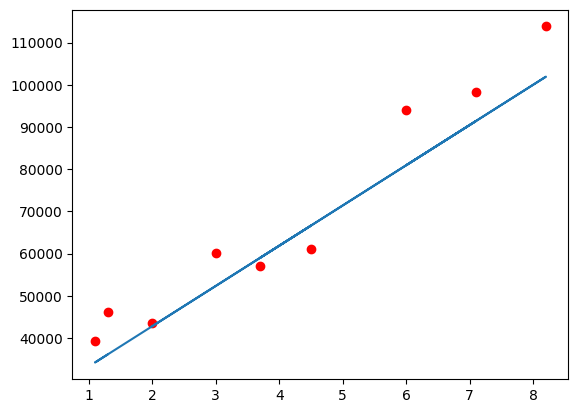

In [24]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,Y_prediction)